In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Step 1: Create a complex function
def complex_function(x):
    return torch.exp(-0.1*x) * torch.sin(2*x) + 0.5*x**2 - torch.cos(0.5*x)

In [38]:
# step 2: Create a dataset (that I use to train the model)
x = torch.linspace(-10, 10, 1000).view(-1, 1).to('cuda')
y = complex_function(x).to('cuda')
print(x.shape, y.shape)

torch.Size([1000, 1]) torch.Size([1000, 1])


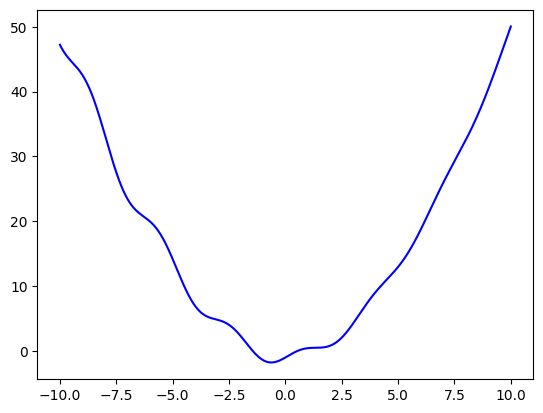

In [ ]:
# plotting the function to see what it looks like
plt.plot(x.cpu(), y.cpu(), color='blue')

In [101]:
# creating now the model: lets start with one 10 neurons layer
model = nn.Sequential(
    nn.Linear(1, 64),   # input layer
    nn.ReLU(),          # non-linearity
    nn.Linear(64, 32),  # hidden layer
    nn.ReLU(),          # non-linearity
    nn.Linear(32, 1)    # output layer
).to('cuda')

loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []

In [106]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [107]:
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad() # reset gradients
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss.item()}')
    losses.append(loss.item())
    loss.backward()
    
    optimizer.step()

Epoch 0, loss 0.00462091201916337
Epoch 100, loss 0.004620764404535294
Epoch 200, loss 0.004620672669261694
Epoch 300, loss 0.004620550200343132
Epoch 400, loss 0.004620417952537537
Epoch 500, loss 0.004620260559022427
Epoch 600, loss 0.004620106425136328
Epoch 700, loss 0.004619937390089035
Epoch 800, loss 0.0046197036281228065
Epoch 900, loss 0.004619485232979059
Epoch 1000, loss 0.004619275219738483
Epoch 1100, loss 0.0046189939603209496
Epoch 1200, loss 0.004618742968887091
Epoch 1300, loss 0.004618473816663027
Epoch 1400, loss 0.004618179518729448
Epoch 1500, loss 0.004617846105247736
Epoch 1600, loss 0.004617498721927404
Epoch 1700, loss 0.004617180209606886
Epoch 1800, loss 0.0046167997643351555
Epoch 1900, loss 0.004616456106305122
Epoch 2000, loss 0.00461615389212966
Epoch 2100, loss 0.004615737125277519
Epoch 2200, loss 0.004615613725036383
Epoch 2300, loss 0.004615073557943106
Epoch 2400, loss 0.004615413956344128
Epoch 2500, loss 0.004614403937011957
Epoch 2600, loss 0.0046

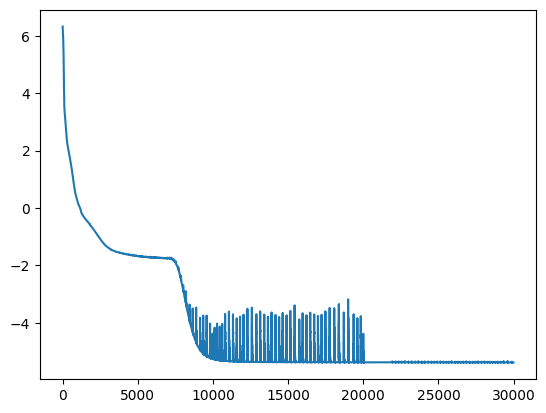

In [108]:
# plotting the loss
import numpy as np
plt.plot(np.log(losses))

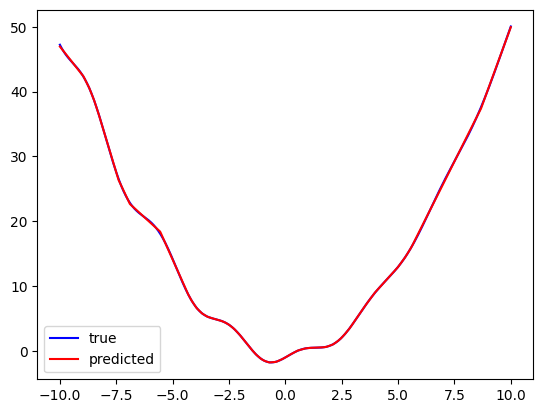

In [109]:
# testing
y_new = model(x).detach()
plt.plot(x.cpu(), y.cpu(), color='blue', label='true')
plt.plot(x.cpu(), y_new.cpu(), color='red', label='predicted')
plt.legend()